In [9]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

In [10]:
worker_order_df = pd.read_csv('cleanworkorderoutliers.csv')

### Columns to encode
1. 'AffectedProduction'
2. ,'GrossProductionLoss',
3. 'Duration',
4. 'DaysFromLastFailure_int

In [11]:
outliers = worker_order_df[['AffectedProduction','GrossProductionLoss','Duration', 'DaysFromLastFailure_int']].quantile([0.25,0.3 ,0.5,0.8, 0.9, 0.95, 0.99, 0.995, 0.999, 0.9999]).transpose()
outliers['max'] = worker_order_df[['AffectedProduction','GrossProductionLoss','Duration','DaysFromLastFailure_int' ]].max()
outliers['mean'] = worker_order_df[['AffectedProduction','GrossProductionLoss','Duration', 'DaysFromLastFailure_int']].mean()
outliers['min'] = worker_order_df[['AffectedProduction','GrossProductionLoss','Duration', 'DaysFromLastFailure_int']].min()

print(outliers)

                         0.25   0.3    0.5    0.8     0.9    0.95    0.99  \
AffectedProduction        0.0   0.0    0.0    0.0     4.0    14.0    75.0   
GrossProductionLoss       0.0   0.0    0.0    0.0     0.0     0.0   100.0   
Duration                  1.0   1.0    1.0    2.0     7.0     7.0    93.0   
DaysFromLastFailure_int  24.0  36.0  127.0  597.0  1171.0  1936.0  3565.0   

                           0.995       0.999       0.9999        max  \
AffectedProduction        150.00     940.968    7000.0000  318455302   
GrossProductionLoss       300.00  594062.484  595199.2968     595336   
Duration                   93.00     259.484     621.6484     687389   
DaysFromLastFailure_int  3916.42    4216.000    4328.0000       5081   

                                mean  min  
AffectedProduction        671.439087    0  
GrossProductionLoss      1436.399883    0  
Duration                    9.072405    1  
DaysFromLastFailure_int   410.142711    1  


In [12]:
clean_worker_order_df = worker_order_df
AP_bins = [0.0,4.0, 14.0, 75.0, 150.0, 940.0, 7000.0, 318455303]
# Right = False -> Inclusive on both sides
clean_worker_order_df['AffectedProduction'] = pd.cut(clean_worker_order_df['AffectedProduction'], AP_bins, labels=range(len(AP_bins)-1), right=False)

GPL_bins = [0.0, 100.0, 300.0, 595337]
clean_worker_order_df['GrossProductionLoss'] = pd.cut(clean_worker_order_df['GrossProductionLoss'], GPL_bins, labels=range(len(GPL_bins)-1), right=False)

D_bins = [1.0, 2.0, 7.0, 93.0, 259.0, 621.0, 687390]
clean_worker_order_df['Duration'] = pd.cut(clean_worker_order_df['Duration'], D_bins, labels=range(len(D_bins)-1), right=False)

DLF_bins = [0.0 ,1.0, 24.0 , 36.0  ,127.0,  597.0 , 1171.0,  1936.0, 3916.0, 5082]
clean_worker_order_df['DaysFromLastFailure_int'] = pd.cut(clean_worker_order_df['DaysFromLastFailure_int'], DLF_bins, labels=range(len(DLF_bins)-1), right=False)


In [13]:
job_df_predict = clean_worker_order_df
job_df_predict = shuffle(job_df_predict, random_state=0)
# job_df_predict = job_df_predict[0:100000]

X_wo_D = job_df_predict.loc[:, job_df_predict.columns != "Duration"]
X_wo_AP = job_df_predict.loc[:, job_df_predict.columns != "AffectedProduction"]
X_wo_GPL = job_df_predict.loc[:, job_df_predict.columns != "GrossProductionLoss"]
X_wo_DLF = job_df_predict.loc[:, job_df_predict.columns != "DaysFromLastFailure_int"]

Xs = [X_wo_D, X_wo_AP, X_wo_GPL, X_wo_DLF]
y = ["Duration","AffectedProduction","GrossProductionLoss","DaysFromLastFailure_int"]

X_D_train, X_D_test, y_D_train, y_D_test = train_test_split(Xs[0], job_df_predict['Duration'], test_size=0.2, random_state=42)
X_AP_train, X_AP_test, y_AP_train, y_AP_test = train_test_split(Xs[1], job_df_predict['AffectedProduction'], test_size=0.2, random_state=42)
X_GPL_train, X_GPL_test, y_GPL_train, y_GPL_test = train_test_split(Xs[2], job_df_predict['GrossProductionLoss'], test_size=0.2, random_state=42)
X_DLF_train, X_DLF_test, y_DLF_train, y_DLF_test = train_test_split(Xs[3], job_df_predict['DaysFromLastFailure_int'], test_size=0.2, random_state=42)

splits = [[X_D_train, X_D_test, y_D_train, y_D_test], [X_AP_train, X_AP_test, y_AP_train, y_AP_test], [X_GPL_train, X_GPL_test, y_GPL_train, y_GPL_test], [X_DLF_train, X_DLF_test, y_DLF_train, y_DLF_test]]



Predicting:  Duration

Training MLP


/Users/einar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.7925111681005956
Recall: 0.16773465289237366
Precision: 0.27495378859631103
F1: 0.14953285989714146


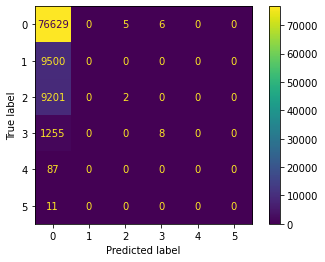

Training Decision Tree Regressor
Accuracy: 0.7935659331568498
Recall: 0.528468848833937
Precision: 0.5298437599148255
F1: 0.5289682584616842


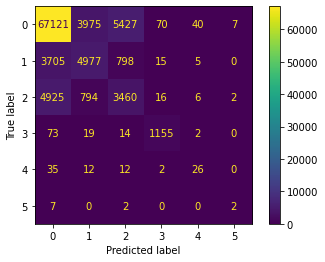

Training Random Forest Regressor
Accuracy: 0.8365320979483786
Recall: 0.48188242604582915
Precision: 0.661078767253315
F1: 0.5289839778715669


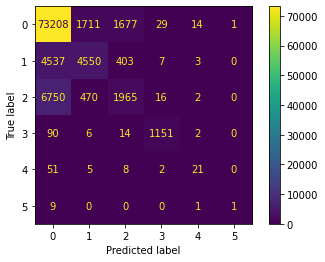

Training K-Nearest Neighbors Regressor
Accuracy: 0.8190664295168762
Recall: 0.3995350628451717
Precision: 0.495316302615328
F1: 0.42587039917769554


/Users/einar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


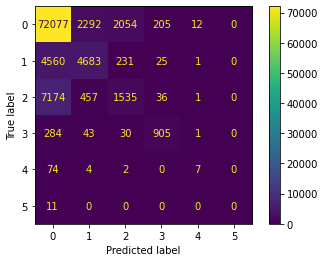




Predicting:  AffectedProduction

Training MLP


/Users/einar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.9266111019192588
Recall: 0.2851156223134971
Precision: 0.3136845712914799
F1: 0.2397039072113371


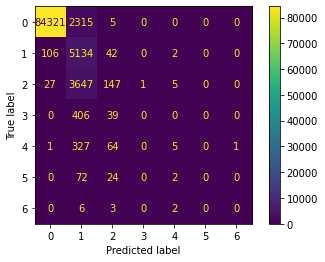

Training Decision Tree Regressor
Accuracy: 0.9330948047650562
Recall: 0.4163602598898789
Precision: 0.42292322927276416
F1: 0.41802377260389756


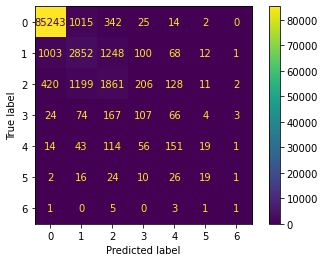

Training Random Forest Regressor
Accuracy: 0.933704913964262
Recall: 0.39132730850111525
Precision: 0.5313308908903297
F1: 0.4197301857403713


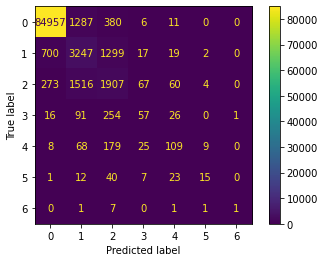

Training K-Nearest Neighbors Regressor


/Users/einar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.8890221707478491
Recall: 0.15950951891358445
Precision: 0.25778561433211417
F1: 0.1657477715635814


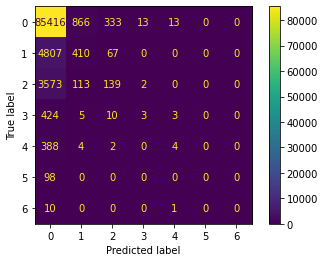




Predicting:  GrossProductionLoss

Training MLP
Accuracy: 0.9896695069490403
Recall: 0.3333298504447649
Precision: 0.3298932470209473
F1: 0.3316026450599157


/Users/einar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


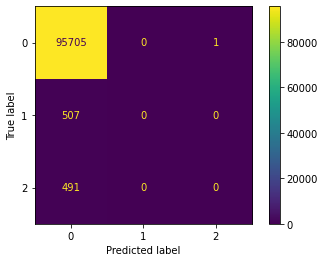

Training Decision Tree Regressor
Accuracy: 0.9834236432825944
Recall: 0.514218818099427
Precision: 0.4959915420365193
F1: 0.5042699626064007


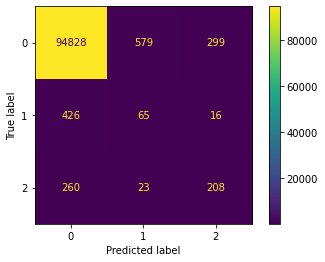

Training Random Forest Regressor
Accuracy: 0.9908587028457975
Recall: 0.4543919828883672
Precision: 0.7012673593206248
F1: 0.5044511707210757


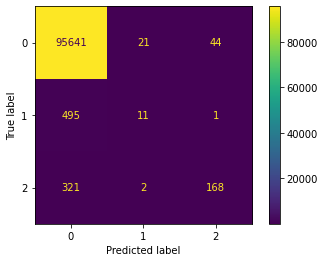

Training K-Nearest Neighbors Regressor
Accuracy: 0.9895247352746526
Recall: 0.34269389346789697
Precision: 0.5491592501865518
F1: 0.34932861347890043


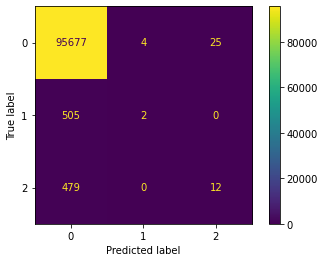




Predicting:  DaysFromLastFailure_int

Training MLP


/Users/einar/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.4039026307081403
Recall: 0.1789968002504921
Precision: 0.21685156453780197
F1: 0.13228444653649898


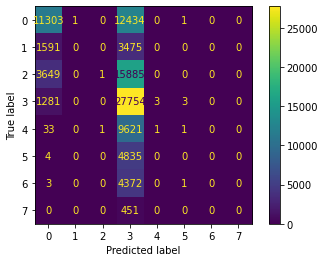

Training Decision Tree Regressor
Accuracy: 0.3997973196558571
Recall: 0.34856771539800685
Precision: 0.34242151332442583
F1: 0.3453465638746924


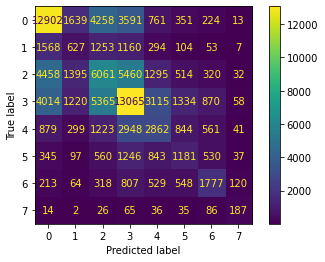

Training Random Forest Regressor
Accuracy: 0.440426455989411
Recall: 0.35955210166113033
Precision: 0.38547363883136787
F1: 0.3688998443860426


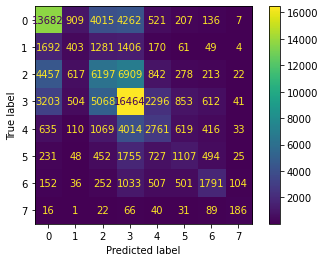

Training K-Nearest Neighbors Regressor
Accuracy: 0.391224768365321
Recall: 0.2534183486539501
Precision: 0.30290279955776456
F1: 0.26360369576071296


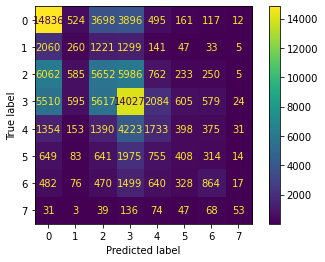

In [6]:
models = {
    "MLP": MLPClassifier(random_state=42, max_iter=300),
    "Decision Tree Regressor": DecisionTreeClassifier(random_state=42),
    "Random Forest Regressor": RandomForestClassifier(random_state=42, n_jobs=-1),
    "K-Nearest Neighbors Regressor": KNeighborsClassifier(),
}

i = 0
for split in splits:
    print("Predicting: ", y[i])
    print("")
    for name, model in models.items():
        print("Training", name)
        model.fit(split[0], split[2])

        y_pred = model.predict(split[1])

        accuracy = accuracy_score(split[3], y_pred)
        recall = recall_score(split[3], y_pred, average='macro')
        precision = precision_score(split[3], y_pred,  average='macro')
        f1 = f1_score(split[3], y_pred,  average='macro')

        cm = confusion_matrix(split[3], y_pred)

        print("Accuracy:", accuracy)
        print("Recall:", recall)
        print("Precision:", precision)
        print("F1:", f1)

        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.show()

    i += 1
    print("")
    print("")
    print("")

### Duration Hyper Parammeter Tuning

Fitting 2 folds for each of 50 candidates, totalling 100 fits
[CV 2/2; 2/50] START bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=10
[CV 2/2; 3/50] START bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=250
[CV 1/2; 1/50] START bootstrap=True, max_depth=None, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=5
[CV 2/2; 1/50] START bootstrap=True, max_depth=None, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=5
[CV 1/2; 4/50] START bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=250
[CV 1/2; 2/50] START bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=10
[CV 2/2; 4/50] START bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=250
[CV 1/2; 3/50] START bootstrap=False,

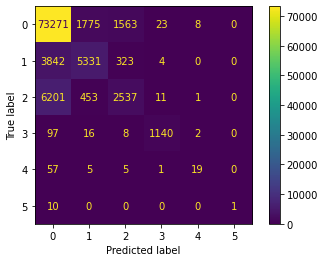

In [14]:
forest_param_grid = {
    'n_estimators': [5, 10, 50, 100, 250],
    'max_features': [1.0, 'sqrt', 'log2'],
    'max_depth': [None, 10, 50, 100],
    'min_samples_split': [ 2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'bootstrap': [True, False]
}

forest_model = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = RandomizedSearchCV(forest_model, forest_param_grid, cv=2,  scoring='accuracy', verbose=10, n_jobs=-1, n_iter=50, random_state=92)

grid_search.fit(splits[0][0], splits[0][2])

print("Best hyperparameters: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(splits[0][1])

accuracy = accuracy_score(splits[0][3], y_pred)
recall = recall_score(splits[0][3], y_pred, average='macro')
precision = precision_score(splits[0][3], y_pred,  average='macro')
f1 = f1_score(splits[0][3], y_pred,  average='macro')

cm = confusion_matrix(splits[0][3], y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1:", f1)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Affected Prodution Hyper Parammeter Tuning

Fitting 2 folds for each of 50 candidates, totalling 100 fits
[CV 1/2; 1/50] START bootstrap=True, max_depth=None, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=5
[CV 2/2; 1/50] START bootstrap=True, max_depth=None, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=5
[CV 1/2; 2/50] START bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=10
[CV 2/2; 2/50] START bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=10
[CV 1/2; 3/50] START bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=250
[CV 2/2; 3/50] START bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=250
[CV 1/2; 4/50] START bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=250
[CV 2/2; 4/50] START bootstrap=True, m

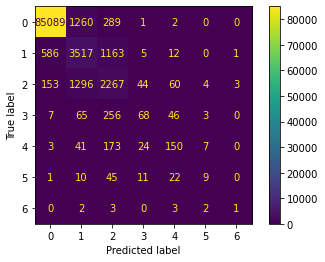

In [15]:
forest_param_grid = {
    'n_estimators': [5, 10, 50, 100, 250],
    'max_features': [1.0, 'sqrt', 'log2'],
    'max_depth': [None, 10, 50, 100],
    'min_samples_split': [ 2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'bootstrap': [True, False]
}

forest_model = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = RandomizedSearchCV(forest_model, forest_param_grid, cv=2,  scoring='accuracy', verbose=10, n_jobs=-1, n_iter=50, random_state=92)

grid_search.fit(splits[1][0], splits[1][2])

print("Best hyperparameters: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(splits[1][1])

accuracy = accuracy_score(splits[1][3], y_pred)
recall = recall_score(splits[1][3], y_pred, average='macro')
precision = precision_score(splits[1][3], y_pred,  average='macro')
f1 = f1_score(splits[1][3], y_pred,  average='macro')

cm = confusion_matrix(splits[1][3], y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1:", f1)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Gross Production Loss Hyper Parammeter Tuning

Fitting 2 folds for each of 50 candidates, totalling 100 fits
[CV 1/2; 1/50] START bootstrap=True, max_depth=None, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=5
[CV 2/2; 1/50] START bootstrap=True, max_depth=None, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=5
[CV 1/2; 2/50] START bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=10
[CV 2/2; 2/50] START bootstrap=True, max_depth=100, max_features=log2, min_samples_leaf=3, min_samples_split=5, n_estimators=10
[CV 1/2; 3/50] START bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=250
[CV 2/2; 3/50] START bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=250
[CV 1/2; 4/50] START bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=250
[CV 2/2; 4/50] START bootstrap=True, m

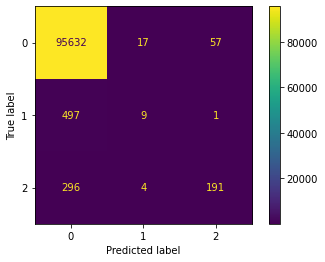

In [16]:
forest_param_grid = {
    'n_estimators': [5, 10, 50, 100, 250],
    'max_features': [1.0, 'sqrt', 'log2'],
    'max_depth': [None, 10, 50, 100],
    'min_samples_split': [ 2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'bootstrap': [True, False]
}

forest_model = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = RandomizedSearchCV(forest_model, forest_param_grid, cv=2,  scoring='accuracy', verbose=10, n_jobs=-1, n_iter=50, random_state=92)

grid_search.fit(splits[2][0], splits[2][2])

print("Best hyperparameters: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(splits[2][1])

accuracy = accuracy_score(splits[2][3], y_pred)
recall = recall_score(splits[2][3], y_pred, average='macro')
precision = precision_score(splits[2][3], y_pred,  average='macro')
f1 = f1_score(splits[2][3], y_pred,  average='macro')

cm = confusion_matrix(splits[2][3], y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1:", f1)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

### Days From Last Failure Hyper Parammeter Tuning

Fitting 2 folds for each of 50 candidates, totalling 100 fits
[CV 2/2; 1/50] START bootstrap=True, max_depth=None, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=5
[CV 2/2; 1/50] END bootstrap=True, max_depth=None, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=5;, score=0.444 total time=   7.6s
[CV 1/2; 6/50] START bootstrap=False, max_depth=50, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=50
[CV 1/2; 6/50] END bootstrap=False, max_depth=50, max_features=1.0, min_samples_leaf=3, min_samples_split=10, n_estimators=50;, score=0.409 total time= 1.6min
[CV 2/2; 8/50] START bootstrap=True, max_depth=10, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=100
[CV 2/2; 8/50] END bootstrap=True, max_depth=10, max_features=1.0, min_samples_leaf=5, min_samples_split=10, n_estimators=100;, score=0.460 total time= 1.1min
[CV 2/2; 21/50] START bootstrap=True, max_depth=None, max_features=log2, min_

/Users/einar/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 1/2; 3/50] START bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=250
[CV 1/2; 3/50] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=2, n_estimators=250;, score=0.444 total time= 1.0min
[CV 2/2; 7/50] START bootstrap=True, max_depth=None, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=50
[CV 2/2; 7/50] END bootstrap=True, max_depth=None, max_features=1.0, min_samples_leaf=3, min_samples_split=5, n_estimators=50;, score=0.463 total time= 1.1min
[CV 2/2; 14/50] START bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=5
[CV 2/2; 14/50] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=3, min_samples_split=2, n_estimators=5;, score=0.453 total time=   3.7s
[CV 2/2; 15/50] START bootstrap=True, max_depth=50, max_features=1.0, min_samples_leaf=1, min_samples_split=10, n_estimators=5
[CV 2/2; 15/

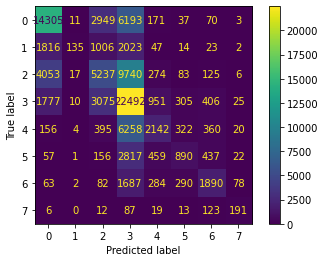

In [14]:
forest_param_grid = {
    'n_estimators': [5, 10, 50, 100, 250],
    'max_features': [1.0, 'sqrt', 'log2'],
    'max_depth': [None, 10, 50, 100],
    'min_samples_split': [ 2, 5, 10],
    'min_samples_leaf': [1, 3, 5],
    'bootstrap': [True, False]
}

forest_model = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = RandomizedSearchCV(forest_model, forest_param_grid, cv=2,  scoring='accuracy', verbose=10, n_jobs=-1, n_iter=50, random_state=92)

grid_search.fit(splits[3][0], splits[3][2])

print("Best hyperparameters: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(splits[3][1])

accuracy = accuracy_score(splits[3][3], y_pred)
recall = recall_score(splits[3][3], y_pred, average='macro')
precision = precision_score(splits[3][3], y_pred,  average='macro')
f1 = f1_score(splits[3][3], y_pred,  average='macro')

cm = confusion_matrix(splits[3][3], y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1:", f1)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()